In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/cheri/Downloads/Community_Crime_Statistics_20240522.csv")
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [3]:
df.shape

(70661, 5)

In [4]:
df.isnull().sum()

Community      0
Category       0
Crime Count    0
Year           0
Month          0
dtype: int64

In [5]:
df.dtypes

Community      object
Category       object
Crime Count     int64
Year            int64
Month           int64
dtype: object

In [6]:
df.describe()

,Crime Count,Year,Month
count,70661.000000,70661.000000,70661.000000
mean,2.855748,2020.618616,6.369242
std,3.664965,1.825330,3.451445
min,1.000000,2018.000000,1.000000
25%,1.000000,2019.000000,3.000000
50%,2.000000,2021.000000,6.000000
75%,3.000000,2022.000000,9.000000
max,111.000000,2024.000000,12.000000


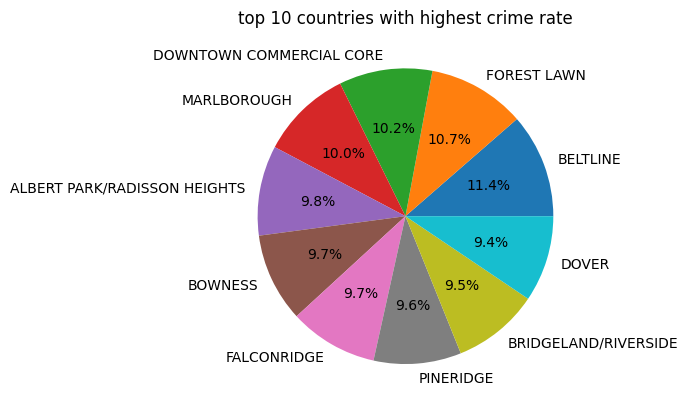

In [7]:
values=df["Community"].value_counts().head(10)
plt.pie(df["Community"].value_counts().head(10) ,labels=values.index ,autopct="%1.1f%%")
plt.title("top 10 countries with highest crime rate")
plt.show()


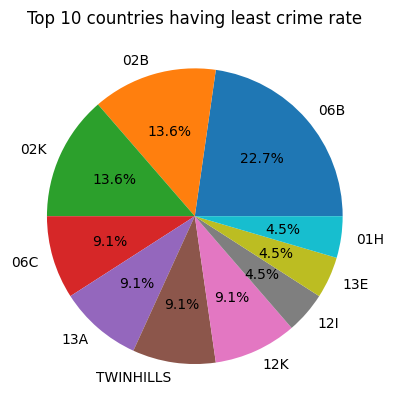

In [7]:
values=df["Community"].value_counts().tail(10)
plt.pie(df["Community"].value_counts().tail(10) , labels=values.index , autopct="%1.1f%%")
plt.title("Top 10 countries having least crime rate")
plt.show()

In [9]:
#based on category

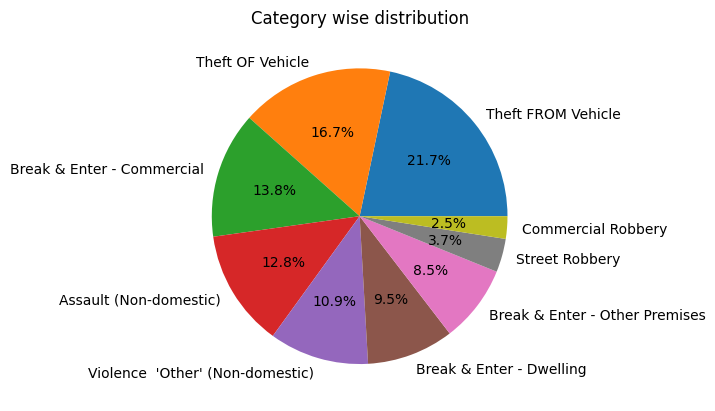

In [8]:
value=df["Category"].value_counts()
plt.pie(df["Category"].value_counts() , labels=value.index  , autopct="%1.1f%%")
plt.title("Category wise distribution")
plt.show()

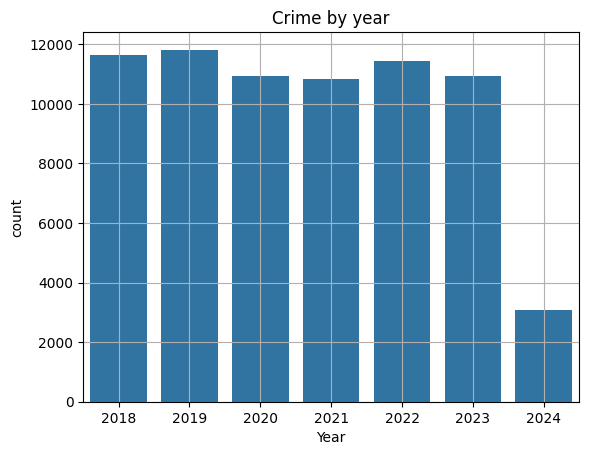

In [9]:
sns.countplot(x="Year", data=df)
plt.grid()
plt.title("Crime by year")
plt.show()

In [12]:
# the no.of crime in 2024 are less because we have limited data in 2024 , our data is only upto april 2024

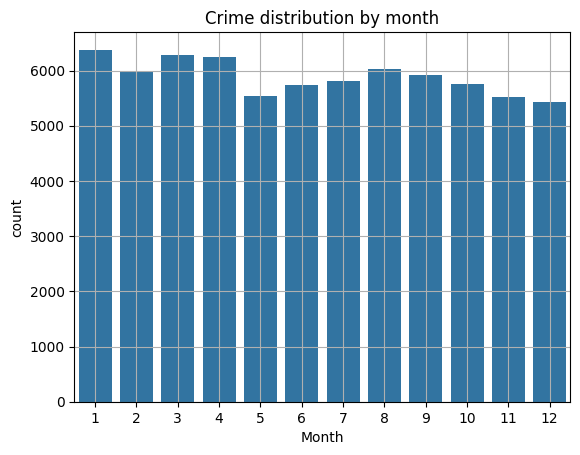

In [10]:
sns.countplot(x="Month" , data=df  )
plt.title("Crime distribution by month")
plt.grid()
plt.show()

In [14]:
# highest no.of crimes are happened in the first month. followed by 3rd , followed by 4th month

C:\Users\cheri\AppData\Local\Temp\ipykernel_6184\1611266576.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right" , fontsize=5)


<Axes: xlabel='Community', ylabel='count'>

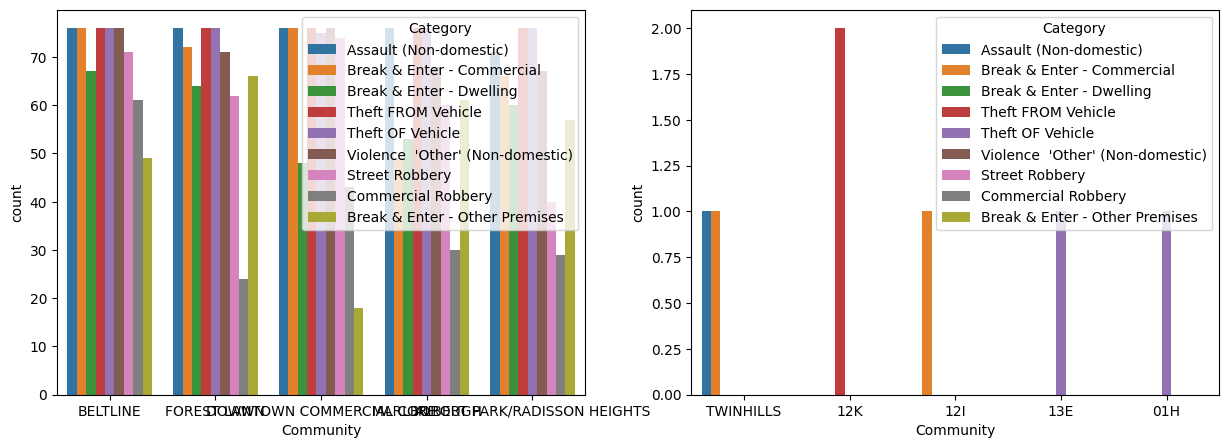

In [11]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="Community" , data=df , hue="Category" , order=df["Community"].value_counts().head(5).index , ax=ax[0])
plt.legend(loc="upper right" , fontsize=5)
sns.countplot(x="Community" , data=df , hue="Category" , order=df["Community"].value_counts().tail(5).index , ax=ax[1])

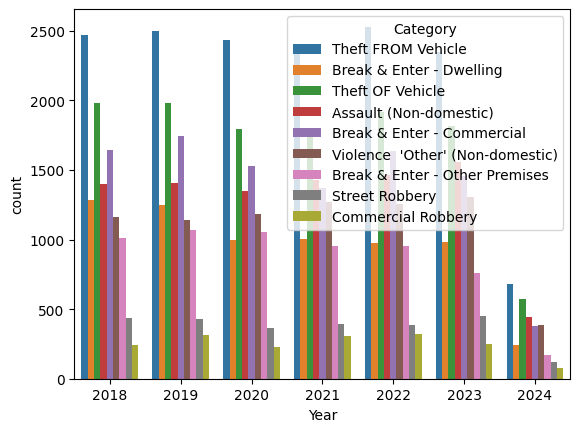

In [12]:
sns.countplot(x="Year" , data=df , hue="Category")
plt.show()

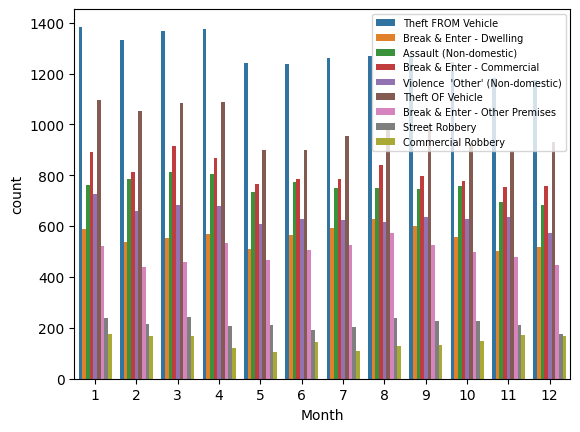

In [13]:
sns.countplot(x="Month" , data=df , hue="Category")
plt.legend(loc="upper right" , fontsize=7)
plt.show()

In [18]:
# in all of the months the  category with highest no.of crimes is Theft FROM vehicle

In [19]:
#data processing 2
# in our data we have community , category , are having dtypes =object we have to encode them 

In [14]:
#label encoding
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
df["Community"]=model.fit_transform(df["Community"])
df["Category"]=model.fit_transform(df["Category"])

In [15]:
df.dtypes

Community      int64
Category       int64
Crime Count    int64
Year           int64
Month          int64
dtype: object

In [16]:
df.head()

,Community,Category,Crime Count,Year,Month
0,0,0,1,2022,11
1,0,1,1,2019,6
2,0,1,1,2019,8
3,0,1,2,2020,3
4,0,1,2,2020,7


In [23]:
#building neural network

In [32]:
def create_sequence(data , time_stamp):
    x=[]
    y=[]
    for i in range(len(data) - time_stamp):
        seq_x=data.iloc[i:(i+time_stamp)].to_numpy()
        seq_y=data.iloc[i+time_stamp]["Crime Count"]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x),np.array(y)

In [33]:
time_stamp=3
X,y=create_sequence(df,time_stamp)

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_temp, y_train  , y_temp = train_test_split(X,y , test_size=0.3 , random_state=42)
x_val , x_test , y_val, y_test=train_test_split(x_temp , y_temp , test_size=0.5 , random_state=42)

In [38]:
#building lstm model

In [1]:
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'